# Prepare the data

In [55]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [57]:
chars = sorted(list(set("".join(words))))
vocab_size = len(chars)

In [58]:
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0 
itos = {i: char for char, i  in stoi.items()}
block_size = 3

### Create a train/val/tast split

In [75]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w+'.':
            ix = stoi[ch]
            Y.append(ix)
            X.append(context)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

# MLP

### Initialize parameters

In [60]:
E = torch.randn((27, 10))
W1 = torch.randn((30, 300))
b1 = torch.randn(300)
W2 = torch.randn((300, 27))
b2 = torch.randn(27)
parameters = [E, W1, W2, b1, b2]
for p in parameters:
    p.requires_grad = True

In [61]:
params = sum(p.nelement() for p in parameters)
params

17697

# Training

In [63]:
lre = torch.linspace(-3, 0, 1000)
lrs = 100**lre

In [64]:
lri= []
lossi = []
stepi = []


In [65]:
for _ in range(200000):
    
    ix = torch.randint(1, Xtr.shape[0], (32, ))
    
    emb = E[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    lr = 0.1 if _ < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # lri.append(lre[_])
    stepi.append(_)
    lossi.append(loss.log10().item())
print(loss.item())

2.345484733581543


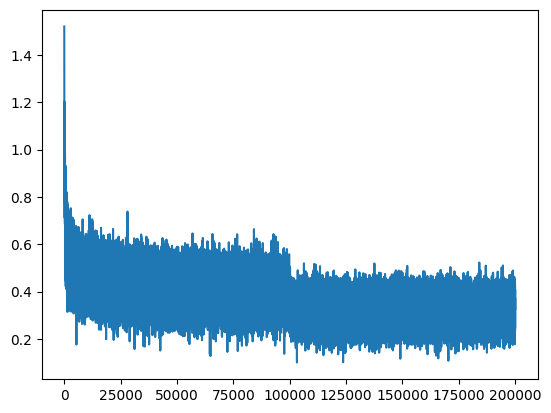

In [66]:
plt.plot(stepi, lossi)

### Evaluating loss

In [71]:
emb = E[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1177, grad_fn=<NllLossBackward0>)

In [72]:
emb = E[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1772, grad_fn=<NllLossBackward0>)

In [73]:
emb = E[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1868, grad_fn=<NllLossBackward0>)

# Sampling from the model

In [79]:
for i in range(20):
    out = []
    context = [0]*block_size
    while True:
        emb1 = E[torch.tensor([context])]
        h = torch.tanh(emb1.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        p = F.softmax(logits, dim=1)
        ix = torch.multinomial(p, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix ==0:
            break
        
    print(''.join(itos[i] for i in out ))

lor.
jorda.
jessidon.
olegla.
kins.
vion.
adynsayah.
silee.
lum.
landriq.
jaiden.
dentihansina.
jawa.
skynnso.
daano.
rhyton.
azishanna.
issan.
johzatu.
ara.


## Pretty good))